# **Importing dependencies**

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Image Processing

**Convert images to numpy arrays**

Done in traing in Extracting train notebook

Exporting the process image of numpyarray in data from extracting-train notebook

In [2]:
# Load the data
loaded_data = np.load('/kaggle/input/extracting-train/training_data.npz')

# Access the NumPy array
data = loaded_data['data']

In [3]:
image_count = data.shape[0]
print('Number of images: ', image_count)

Number of images:  50000


# **Labels Processing**

In [4]:
labels_df = pd.read_csv('/kaggle/input/cifar-10/trainLabels.csv')

In [5]:
labels_df.shape

(50000, 2)

In [6]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [7]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [8]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [9]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


Labels are marked serially by id and evenly distributed ( below )

In [10]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [11]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [12]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [13]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


In [14]:
len(labels)

50000

Checking labels correctness:

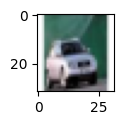

In [15]:
img = data[9998]
plt.figure(figsize=(2,1))
plt.imshow(img)

In [16]:
labels_df[labels_df['id'] == 9999]

,id,label
9998,9999,automobile


In [17]:
labels[9998] # automobile = 1 , and 0 base indexing in List

1

In [18]:
id_list = list(labels_df['id'])

In [19]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


# **Analyzing the train set**

**Displaying the images**

,id,label
9998,9999,automobile


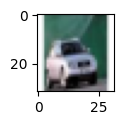

In [20]:
#display an image
img = data[9998]
plt.figure(figsize=(2,1))
plt.imshow(img)

labels_df[labels_df['id'] == 9999]

,id,label
10012,10013,frog


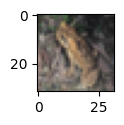

In [21]:
#display an image
img = data[10012]
plt.figure(figsize=(2,1))
plt.imshow(img)

labels_df[labels_df['id'] == 10013]

In [22]:
image_count = data.shape[0]
print('Number of images: ', image_count)

Number of images:  50000


**Distribution of Classes**

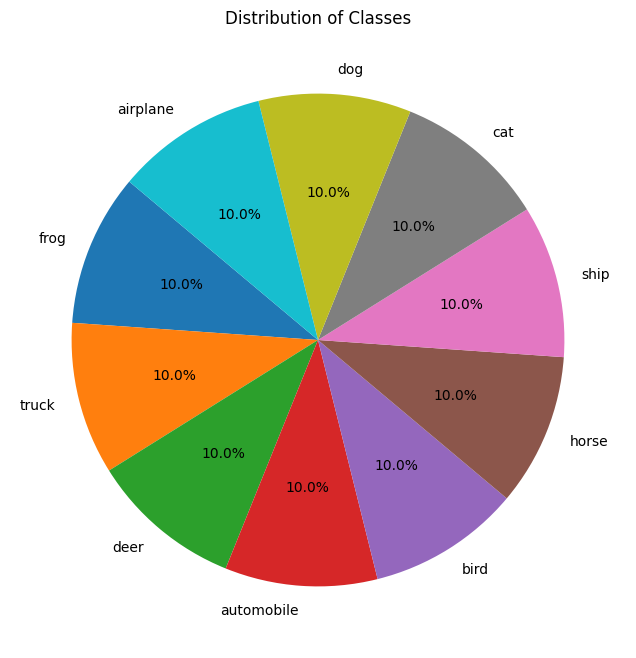

In [23]:
class_counts = labels_df['label'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')
plt.show()

The classes are equally distributed. Our target is removing the truck class from train data so that the model can be trained in 9 classes and Truck becomes a **novel  class**

# **Train Test Split**

In [24]:
type(data)

numpy.ndarray

In [25]:
len(data)

50000

In [26]:
type(data[0])

numpy.ndarray

In [27]:
data[0].shape

(32, 32, 3)

In [28]:
# convert image list and label list to numpy arrays

x = data
y = np.array(labels)

In [29]:
y[0]

6

In [30]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


In [31]:
#small data for testing while naking the model
# x = x[:100]
# y = y[:100]

In [32]:
x[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [34]:
print(x.shape, x_train.shape, x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [35]:
# scaling the data

x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [36]:
x_train_scaled[0]

array([[[0.81960784, 0.82352941, 0.79607843],
        [0.83529412, 0.83921569, 0.81960784],
        [0.85490196, 0.85882353, 0.84313725],
        ...,
        [0.49803922, 0.29019608, 0.15294118],
        [0.47843137, 0.26666667, 0.1372549 ],
        [0.45490196, 0.24705882, 0.1254902 ]],

       [[0.82352941, 0.82352941, 0.79215686],
        [0.83529412, 0.83921569, 0.81176471],
        [0.85490196, 0.8627451 , 0.83921569],
        ...,
        [0.48627451, 0.2745098 , 0.1372549 ],
        [0.4745098 , 0.2627451 , 0.12941176],
        [0.48235294, 0.27058824, 0.14117647]],

       [[0.80784314, 0.80392157, 0.76470588],
        [0.81960784, 0.81960784, 0.79215686],
        [0.83529412, 0.84313725, 0.81960784],
        ...,
        [0.48627451, 0.2745098 , 0.14509804],
        [0.51372549, 0.30196078, 0.16470588],
        [0.51372549, 0.30588235, 0.16078431]],

       ...,

       [[0.49803922, 0.42352941, 0.38039216],
        [0.54117647, 0.47843137, 0.43137255],
        [0.55294118, 0

# Removing the label: Truck( encoding = 9) from training sample

In [37]:
x_train_9_classes = []
y_train_9_classes = []

In [38]:
for i, y_label in enumerate(y_train):
    if y_label != 9:
        x_train_9_classes.append(x_train_scaled[i])
        y_train_9_classes.append(y_label)

In [39]:
x_train_9_classes = np.array(x_train_9_classes)
y_train_9_classes = np.array(y_train_9_classes)

In [40]:
print(type(x_train), type(x_train_9_classes))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [41]:
x_train.shape

(40000, 32, 32, 3)

In [42]:
x_train_9_classes.shape

(35975, 32, 32, 3)

In [43]:
print(type(y_train), type(y_train_9_classes))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [44]:
y_train.shape

(40000,)

In [45]:
y_train_9_classes.shape

(35975,)

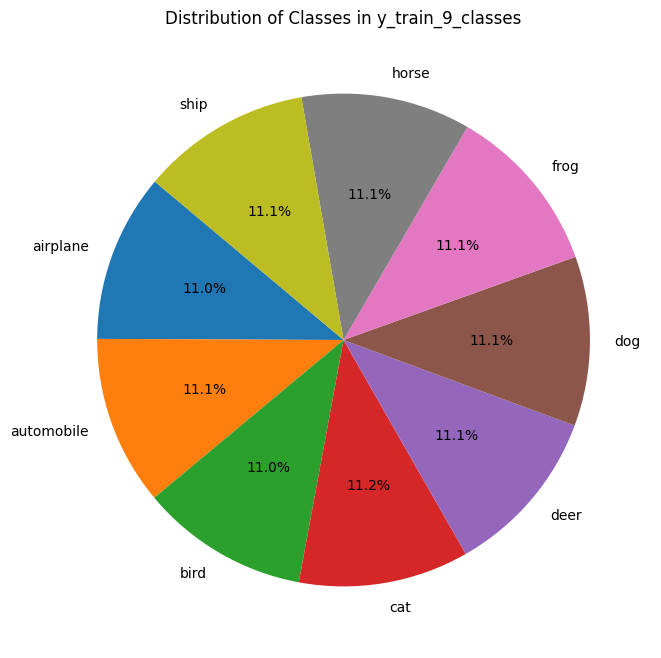

In [46]:
# Assuming y_train_9_classes contains the labels after removing one class
class_counts = np.bincount(y_train_9_classes)

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=list(labels_dictionary.keys())[:-1], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes in y_train_9_classes')
plt.show()


As we can see there is no truck class in our training examples. We will train our model using this 9 classes which are equally distributed

# Defining the neural network using Resnet50

In [47]:
import tensorflow as tf
from tensorflow import keras

In [48]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

Resnet: https://keras.io/api/applications/resnet/

In [49]:
def createModel():
    
    num_of_classes = 10
    
    convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
    
    model = models.Sequential() 
    
    model.add(layers.UpSampling2D((2,2))) # 32 * 2 = 64
    model.add(layers.UpSampling2D((2,2))) # 64 * 2 = 128
    model.add(layers.UpSampling2D((2,2))) # 128 * 2 = 256

    model.add(convolutional_base)

    model.add(layers.Flatten())  # transforms the input into a one-dimensional array (flattens it) without modifying the actual data. 

    model.add(layers.BatchNormalization()) #normalization
    model.add(layers.Dense(128, activation='relu'))

    model.add(layers.Dropout(0.5)) #droping or making somen neuron inactive to avoid overfitting

    model.add(layers.BatchNormalization())
    model.add(layers.Dense(num_of_classes, activation='softmax'))
    
    return model

#  Model creation and compilation

In [50]:
model = createModel()

94765736/94765736 [==============================] - 0s 0us/step


In [51]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model train

In [52]:
history = model.fit(x_train_9_classes, y_train_9_classes, validation_split=0.1, epochs= 10, batch_size=100)

Epoch 1/10
324/324 [==============================] - 255s 648ms/step - loss: 0.9346 - accuracy: 0.6911 - val_loss: 3.5105 - val_accuracy: 0.1053
Epoch 2/10
324/324 [==============================] - 201s 622ms/step - loss: 0.4747 - accuracy: 0.8413 - val_loss: 2.1897 - val_accuracy: 0.2693
Epoch 3/10
324/324 [==============================] - 201s 622ms/step - loss: 0.3035 - accuracy: 0.9008 - val_loss: 0.6514 - val_accuracy: 0.7882
Epoch 4/10
324/324 [==============================] - 201s 622ms/step - loss: 0.2073 - accuracy: 0.9316 - val_loss: 0.5421 - val_accuracy: 0.8371
Epoch 5/10
324/324 [==============================] - 201s 622ms/step - loss: 0.1531 - accuracy: 0.9504 - val_loss: 0.4591 - val_accuracy: 0.8666
Epoch 6/10
324/324 [==============================] - 201s 622ms/step - loss: 0.1143 - accuracy: 0.9628 - val_loss: 0.5277 - val_accuracy: 0.8491
Epoch 7/10
324/324 [==============================] - 201s 622ms/step - loss: 0.0871 - accuracy: 0.9715 - val_loss: 0.6645 -

# Model Evaluation with different metrics and plot

In [53]:
 from sklearn.metrics import f1_score

In [54]:
y_pred = model.predict(x_test_scaled)


313/313 [==============================] - 22s 63ms/step


In [55]:
y_pred_labels = y_pred.argmax(1)
# y_pred_labels = [np.argmax(i) for i in y_pred]

In [56]:
f1 = f1_score(y_test, y_pred_labels, average="macro")
print('F1 score =', f1)

F1 score = 0.7381392058957292


In [57]:
loss, accuracy  = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 21s 66ms/step - loss: 1.7626 - accuracy: 0.7760
Test Accuracy = 0.7760000228881836


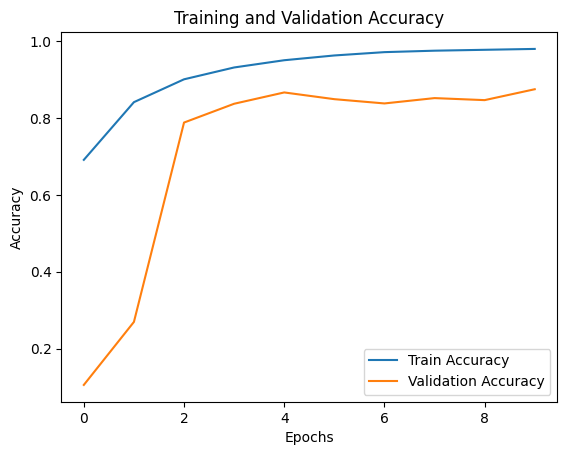

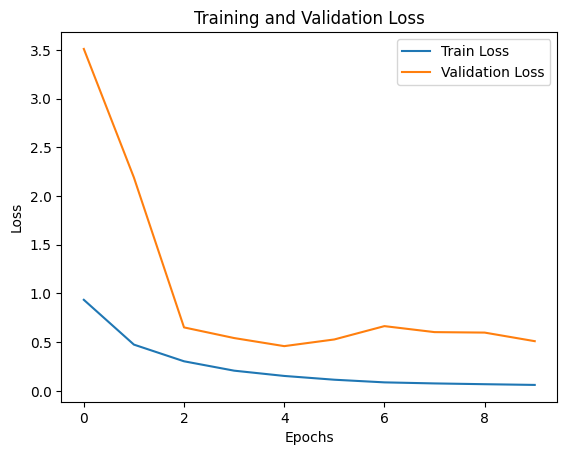

In [58]:

# Extract the metrics from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


# Plot accuracy
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

**Confusion Matrix**

In [59]:
import seaborn as sns
from tensorflow.math import confusion_matrix

In [60]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [61]:
print(conf_mat)

tf.Tensor(
[[898   2  37  31   6   9   1   6  39   0]
 [ 13 936   3  11   0   3   2   3  21   4]
 [ 36   2 859  68  25  15  19   3   4   0]
 [  4   0  33 858  22  49   9   6   1   0]
 [  3   0  18  67 888  13   7   7   5   0]
 [  1   0  34 192  25 728   6  11   1   0]
 [  3   2  22  76  33  14 838   3   3   0]
 [  0   0  18  65  52  34   1 825   3   0]
 [ 26   1  10  16   1   1   1   4 929   0]
 [113 550  17  64   2  14   9  32 173   1]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

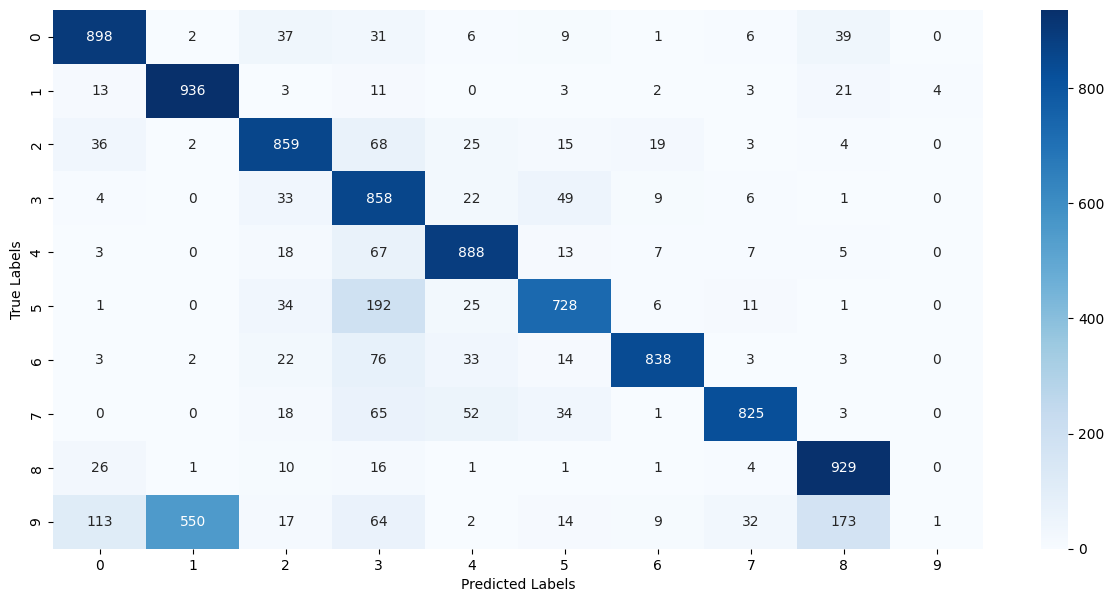

In [62]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

As we can see all the true label of **9 ( class truck )** are **misclassified** as this class is not see during the training process. For the network this new class is a ***novel class***.

# Saving the model

In [63]:

model.save('/kaggle/working/CIFAR_resnet_model.h5')


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
